# Global Solution - Redes Neurais


In [57]:
# Importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers  import Dense, Dropout
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Descrição do dataset

*Heart Attack Prediction*

Este conjunto de dados é voltado para a análise de risco de ataque cardíaco em pacientes, com base em uma variedade de fatores de saúde e estilo de vida. Aqui está uma explicação de cada coluna:

1. **Patient ID**: Um identificador único para cada paciente.
2. **Age**: Idade do paciente.
3. **Sex**: Sexo do paciente (Masculino ou Feminino).
4. **Cholesterol**: Nível de colesterol do paciente.
5. **Blood Pressure**: Pressão arterial do paciente, registrada como sistólica/diastólica.
6. **Heart Rate**: Frequência cardíaca do paciente.
7. **Diabetes**: Indica se o paciente tem diabetes (1 para sim, 0 para não).
8. **Family History**: Indica se há histórico de problemas cardíacos na família (1 para sim, 0 para não).
9. **Smoking**: Indica se o paciente é fumante (1 para sim, 0 para não).
10. **Obesity**: Indica se o paciente é obeso (1 para sim, 0 para não).
11. **Alcohol Consumption**: Consumo de álcool do paciente.
12. **Exercise Hours Per Week**: Quantidade de horas de exercício por semana.
13. **Diet**: Qualidade da dieta do paciente (por exemplo, "Average" indica uma dieta média).
14. **Previous Heart Problems**: Indica se o paciente teve problemas cardíacos anteriormente (1 para sim, 0 para não).
15. **Medication Use**: Indica se o paciente faz uso de medicamentos (1 para sim, 0 para não).
16. **Stress Level**: Nível de estresse do paciente.
17. **Sedentary Hours Per Day**: Quantidade de horas sedentárias por dia.
18. **Income**: Renda anual do paciente.
19. **BMI**: Índice de Massa Corporal do paciente.
20. **Triglycerides**: Nível de triglicerídeos no sangue do paciente.
21. **Physical Activity Days Per Week**: Quantidade de dias por semana que o paciente realiza atividades físicas.
22. **Sleep Hours Per Day**: Quantidade média de horas de sono por dia.
23. **Country**: País de residência do paciente.
24. **Continent**: Continente onde o paciente reside.
25. **Hemisphere**: Hemisfério em que o paciente reside (por exemplo, Hemisfério Sul).
26. **Heart Attack Risk**: Risco de ataque cardíaco (1 indica alto risco, 0 indica baixo risco).

Este conjunto de dados é muito útil para pesquisas e análises no campo da saúde, particularmente em relação à saúde cardíaca e aos fatores de risco associados a ataques cardíacos.







In [58]:
# Carregando o dataset

dados = pd.read_csv('/content/heart_attack_prediction_dataset.csv', sep=',')

In [59]:
# Mostrando apenas os primeiros 5 dados

dados.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [60]:
# Descrevendo o dataset

dados.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [61]:
# Descrição de uma coluna em específica (ex: Risco de ataque cardíaco)

dados['Heart Attack Risk']

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [62]:
# Removendo colunas que não contribuem para a previsão do risco de ataque cardíaco
colunas_a_remover = ['Patient ID', 'Country', 'Continent', 'Hemisphere', 'Income']
dados_limpos = dados.drop(colunas_a_remover, axis=1)

In [63]:
# Agora, convertendo 'Sex' e 'Diet' para valores numéricos
dados_limpos['Sex'] = dados_limpos['Sex'].map({'Male': 1, 'Female': 0})
dados_limpos = pd.get_dummies(dados_limpos, columns=['Diet'])

# Usando o Label Encoder para converter colunas categóricas em numéricas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [64]:
# Separando a pressão arterial em sistólica e diastólica
dados_limpos[['Blood Pressure Systolic', 'Blood Pressure Diastolic']] = dados_limpos['Blood Pressure'].str.split('/', expand=True).astype(float)
dados_limpos = dados_limpos.drop('Blood Pressure', axis=1)

In [65]:
# Seleção das features

X = dados_limpos.drop('Heart Attack Risk', axis=1)

# Dados da coluna target
y = dados_limpos['Heart Attack Risk']

In [66]:
# Testando a variável "target"
y

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [67]:
# Verificando o formato de "x"

X.shape

(8763, 23)

In [68]:
# Verificando o formato de "x"

y.shape

(8763,)

In [69]:
# Separação de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [70]:
print(y_test.shape)

(1753,)


In [71]:
from sklearn.preprocessing import StandardScaler

# Criação do objeto StandardScaler
scaler = StandardScaler()

# Ajuste nos dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transformação dos dados de teste
X_test_scaled = scaler.transform(X_test)

In [72]:
# Verificando o formato de "X train"

X_train_scaled.shape

(7010, 23)

In [73]:
# Verificando o formato de "Y train"

X_test_scaled.shape


(1753, 23)

### Construção do modelo

In [74]:
# Construindo o modelo
#my_nn = Sequential()
#my_nn.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Ajuste para usar X_train.shape[1] no lugar de X.shape[1]
#my_nn.add(Dense(8, activation='relu'))
#my_nn.add(Dense(1, activation='sigmoid'))



my_nn = Sequential()
my_nn.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
my_nn.add(Dropout(0.9))
my_nn.add(Dense(16, activation='relu'))
my_nn.add(Dense(1, activation='sigmoid'))

In [75]:
# Compilar o modelo
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# Treinamento do modelo
history = my_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=2, validation_data=(X_test_scaled, y_test))

Epoch 1/10
3505/3505 [==============================] - 15s 4ms/step - loss: 0.6916 - accuracy: 0.6257 - val_loss: 0.6610 - val_accuracy: 0.6343
Epoch 2/10
3505/3505 [==============================] - 9s 3ms/step - loss: 0.6615 - accuracy: 0.6357 - val_loss: 0.6608 - val_accuracy: 0.6343
Epoch 3/10
3505/3505 [==============================] - 11s 3ms/step - loss: 0.6578 - accuracy: 0.6397 - val_loss: 0.6580 - val_accuracy: 0.6343
Epoch 4/10
3505/3505 [==============================] - 11s 3ms/step - loss: 0.6556 - accuracy: 0.6414 - val_loss: 0.6585 - val_accuracy: 0.6343
Epoch 5/10
3505/3505 [==============================] - 11s 3ms/step - loss: 0.6546 - accuracy: 0.6432 - val_loss: 0.6573 - val_accuracy: 0.6343
Epoch 6/10
3505/3505 [==============================] - 10s 3ms/step - loss: 0.6538 - accuracy: 0.6439 - val_loss: 0.6566 - val_accuracy: 0.6343
Epoch 7/10
3505/3505 [==============================] - 11s 3ms/step - loss: 0.6528 - accuracy: 0.6439 - val_loss: 0.6569 - val_acc

### Avaliando o modelo

In [77]:
# Avaliando o modelo:
loss, accuracy = my_nn.evaluate(X_test_scaled, y_test)
print(f'Perda do modelo: {loss:.4f}')
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

55/55 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.6343
Perda do modelo: 0.6565
Acurácia do modelo: 63.43%


### Métricas

In [79]:
# Compilar o modelo com métricas adicionais
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])


### Fazendo previsões:


In [80]:
# Selecionando uma amostra aleatória do conjunto de teste para previsão
amostra1 = X_test.sample().to_numpy()

In [81]:
# Fazendo a predição com o modelo treinado
predicao = my_nn.predict(amostra1)


1/1 [==============================] - 0s 62ms/step


In [82]:
# Mostrando a previsão
print(f'Previsão: {predicao[0][0]}')  # Ajustado para mostrar o valor da previsão
if predicao[0][0] > 0.5:  # Ajustado para acessar o primeiro elemento da previsão
    print('Diagnóstico: Alto risco de ataque cardíaco')
else:
    print('Diagnóstico: Baixo risco de ataque cardíaco')

Previsão: 0.13310520350933075
Diagnóstico: Baixo risco de ataque cardíaco


### Utilizando um classificador de algoritmo comum a fim de comparar a acurácia com redes neurais nessa situação (KNN)

In [83]:
# Importando o classificador KNN
from sklearn.neighbors import KNeighborsClassifier

# Configurando o KNN
knn = KNeighborsClassifier(n_neighbors=22)

In [84]:
# Treinando o KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [85]:
# Fazendo previsões
y_pred_knn = knn.predict(X_test)

In [86]:
# Avaliando o modelo KNN
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Acurácia do KNN: {accuracy_knn * 100:.2f}%')

Acurácia do KNN: 60.75%


### Gráficos - Outra forma que escolhemos de facilitar a compreensão da comparação dos modelos.

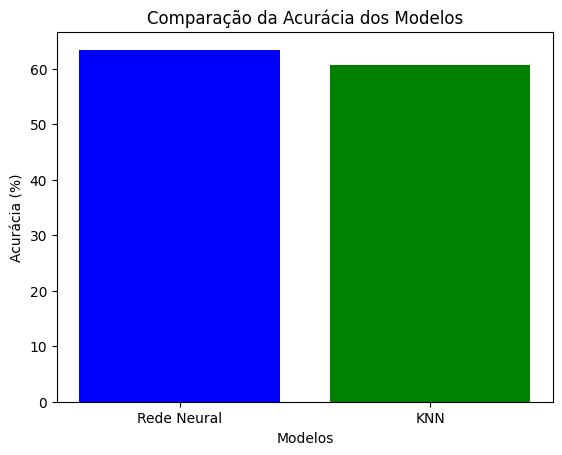

In [87]:
# Comparando a acurácia dos modelos
accuracies = [accuracy * 100, accuracy_knn * 100]
models = ['Rede Neural', 'KNN']

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Modelos')
plt.ylabel('Acurácia (%)')
plt.title('Comparação da Acurácia dos Modelos')
plt.show()

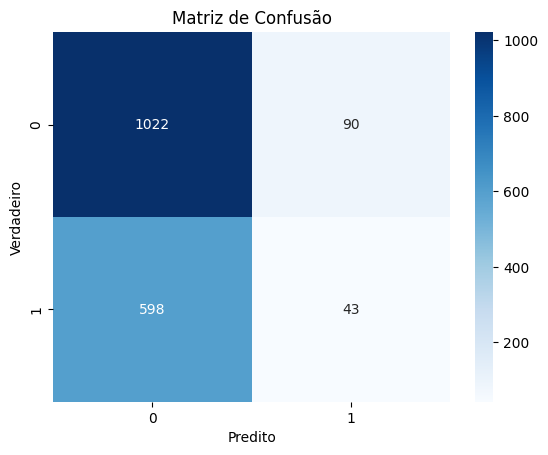

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_knn)

# Plotando a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


# Análise do Processo e do Modelo de Redes Neurais



* Preparação dos Dados: Carreguei inspecionou o conjunto de dados, que inclui uma variedade de fatores relacionados à saúde e estilo de vida, relevantes para a previsão do risco de ataque cardíaco.
Realizei a limpeza e pré-processamento dos dados, incluindo a remoção de colunas não informativas, a conversão de dados categóricos para numéricos e a separação dos dados em características (features) e variável alvo (target).

* Construção do Modelo de Redes Neurais: Defini um modelo de rede neural utilizando o Keras, com camadas densas e uma camada de dropout para reduzir o overfitting. A função de ativação 'relu' foi utilizada nas camadas intermediárias, e 'sigmoid' na camada de saída, adequada para a classificação binária. O modelo foi compilado com a função de perda 'binary_crossentropy' e o otimizador 'adam'.

* Treinamento e Avaliação: O modelo foi treinado com os dados de treino, e a avaliação mostrou uma acurácia de aproximadamente 63.43% no conjunto de teste. Foi utilizada a técnica de validação durante o treinamento para monitorar a performance do modelo nos dados de teste.


# Análise do Modelo KNN

* Explicação: O modelo KNN foi implementado como um classificador alternativo para comparação.
Foi treinado com os mesmos dados de treino e testado com o conjunto de teste, alcançando uma acurácia de 60.75%.

# Considerações Finais

* Performance dos Modelos: Ambos os modelos apresentaram uma acurácia superior a 60%, com a rede neural ligeiramente à frente. Esses resultados são moderados, sugerindo que os modelos têm algum poder preditivo, mas também espaço para melhorias.


* Complexidade do Problema: Dada a natureza complexa e multifatorial do risco de ataque cardíaco, é desafiador para qualquer modelo alcançar acurácias extremamente altas. Isso é especialmente verdadeiro se considerarmos as limitações dos dados e a possibilidade de haver fatores influentes que não estão incluídos no conjunto de dados.

* Possíveis Melhorias: Aumento da Qualidade dos Dados: Mais dados, especialmente características adicionais que são fortes indicadores de risco de ataque cardíaco, podem ajudar a melhorar a acurácia.



# Conclusão:

Os modelos fornecem uma base sólida para a modelagem de risco de ataque cardíaco utilizando machine learning. Os resultados indicam que há um potencial significativo nos modelos utilizados, mas também destaca a necessidade de refinamentos adicionais para melhorar a precisão das previsões. Continuar a explorar e aprimorar o modelo com foco na qualidade dos dados e no ajuste fino da modelagem é um caminho promissor a seguir.
